# Kerr Naked Singularity (KNS) Shadows
## Bao "Tintin" Nguyen
## The University of Arizona
## Updated: November 25, 2023
## This code has been used to generate plots in **"Shadow Geometry of Kerr Naked Singularities"** ([Nguyen et al. 2023](https://iopscience.iop.org/article/10.3847/1538-4357/ace697)), published on the Astrophysical Journal in August 2023.

### **Definition:**
### *(Gravitational) Singularity:* A region where gravity is infinitely strong that spacetime curvature becomes infinite. This "infinity" is considered a mathematical artifact of General Relativity and expected to be corrected by Quantum Gravity, a theory that reconciles General Relativity with Quantum Mechanics.
### *Weak Cosmic Censorship Conjecture*: A hypothesis that all singularities cannot be observed in nature and hidden behind event horizons, regions of no return surrounding black holes that even light cannot escape.
### *Kerr Spacetime*: A mathematical description of spinning black holes in General Relativity, see [Visser 2008](https://arxiv.org/abs/0706.0622) for an introduction
### *Kerr Naked Singularity (KNS):* When a Kerr (spinning) black hole spins faster than a certain limit, its event horizon vanishes, leaving behind a naked singularity at its center.
### *Shadow*: The projection of unstable spherical photon orbits around compact objects like black holes. Essentially, light orbits around the black hole again and again, so our line of sight observes through the emission of accretion flow around black holes, which (roughly) translates to the emission ring we see in the [black hole image](https://eventhorizontelescope.org/blog/astronomers-reveal-first-image-black-hole-heart-our-galaxy) (lots of subtleties overlooked here). The shadow denotes the boundary of the dark region on the black hole image.

### **Goal of this project:**
### - Investigate the geometric properties of KNS shadows through analyzing light orbits from both analytical derivations and numerical ray-tracing simulations
### - Propose an observational framework to search for KNS and test cosmic censorship with direct black hole imaging

# 1. Unstable Spherical Photon Orbits (SPOs) Around KNS

## Technical Details of SPOs

Below are some equations regarding unstable spherical photon orbits (SPOs). See [Teo 2003](https://link.springer.com/article/10.1023/A:1026286607562) for black hole SPOs, [Charbulák & Stuchlík 2018](https://arxiv.org/abs/1811.02648) for KNS SPOs, and section 2.1 of [Nguyen et al. 2023](https://iopscience.iop.org/article/10.3847/1538-4357/ace697) for a summary of SPOs derivation and its application for KNS.

The important takeaways in the equations below:

- a is the black hole/KNS spin, normalized such that 0 = no spin, 1 = maximum spin for a black hole, >1 = KNS

- R(a, r) is the radial effective potential of photon orbits. We solve R = 0 and dR/dr = 0 to obtain SPOs. We impose the condition $d{^2}R/dr^2 < 0$ for *unstable* SPOs.

- Solving the set of equations above result in PHI(a, r) and Q(a, r), which describe effective azimuthal and polar angular momentum of unstable SPOs at constant distance $r = r_p$ from the black hole or KNS with spin a.

- PHI and Q are directly related to the Cartesian $\alpha$-$\beta$ coordinates (analogous to the usual x-y axis) of the light orbits projected to the observer faraway

In [ ]:
from cmath import cos, acos
from math  import sqrt

def PHI(a, r): # azimuthal angular momentum
    "Teo (2003) equation 11b"
    if a == 0 and r == 3:
        return 0 # == - (9/2) * (r-3)/a
    elif a == 1:
        return - (r*r - 2*r - 1)
    else:
        return - (r*r*r - 3*r*r + a*a*r + a*a) / (a * (r-1))

def Q(a, r): # polar angular momentum
    "Teo (2003) equation 11b"
    if a == 0 and r == 3:
        return 27 # == - ((9/2) * (r-3)/a)**2 + 27
    if a == 1:
        return - r*r*r * (r-4)
    else:
        return - r*r*r * (r*r*r - 6*r*r + 9*r - 4*a*a) / (a*a * (r-1)*(r-1))

def R(a, r): # radial effective potential R(a, r), solve for R = 0 and dR/dr = 0 to get spherical photon orbits
    q = Q(a,r)
    phi = PHI(a,r)
    return r**4 + (a**2 - phi**2 - q)*(r**2) + 2*r*( (a - phi) **2 + q ) - a**2 * q

def _cos23acos(x):
    y = cos(2 * acos(x) / 3)
    if y.imag != 0:
        return np.nan
    else:
        return y.real

def cos23acos(X):
    try:
        return np.array([_cos23acos(x) for x in np.array(X)])
    except TypeError:
        return _cos23acos(X)

Z1 = lambda a: 1 + np.cbrt(1 - a*a) * (np.cbrt(1 + a) + np.cbrt(1 - a))
Z2 = lambda a: np.sqrt(3 * a * a + Z1(a) * Z1(a))

reh1 = lambda a: 1 - np.sqrt(1 - a * a) # inner event horizon (black hole)
reh2 = lambda a: 1 + np.sqrt(1 - a * a) # outer event horizon (black hole)
rph1 = lambda a: 2 * (1 + cos23acos(-abs(a))) # retrograde equatorial orbit (general)
rph2 = lambda a: 2 * (1 + cos23acos( abs(a))) # prograde equatorial orbit (general)
rms1bh = lambda a: 3 + Z2(a) - np.sqrt((3 - Z1(a)) * (3 + Z1(a) + 2 * Z2(a))) # inner marginal stable orbit (black hole)
rms2bh = lambda a: 3 + Z2(a) + np.sqrt((3 - Z1(a)) * (3 + Z1(a) + 2 * Z2(a))) # outer marginal stable orbit (black hole)
rms2 = lambda a: 1+(a**2-1)**(1/3) # marginal stable orbit (KNS)

As mentioned in part 1.1, the radii of the unstable SPOs $r_p$ is directly related to the $\alpha$-$\beta$ Cartesian coordinates (analogous to the usual x-y axis) of the light orbits projected to the faraway observer's image plane.

Our goal is to determine when KNS shadow is closed like black holes or open with a gap, depending on its spin $a$ and observational inclination angle $i$. This is motivated by claims of previous literature (i.e., [Kumar & Ghosh 2021](https://arxiv.org/abs/2004.07501)) that KNS shadow cannot be closed, thus the closedness of the shadow ensures that cosmic censorship (which forbiddens naked singularity) is not violated in Kerr spacetime.

Shadows in Kerr spacetime is always symmetric with respect to the α axis on the image plane. Also, they cannot be in 2 distinct unconnected fragments. So, we can determine KNS geometry by solving for **$\beta(r_p) = 0$** and count the number of roots. If there are 2 roots, the shadow is closed. If there is only 1 root, the shadow is open with a gap. If there is no root, the shadow vanishes. This will make more sense when you see the shadow visualizations in section 2.1.

**$\beta(r_p) = 0$** turns out to be a sextic (6th order) polynomial, so we have to solve numerically. You can skip the tedious calculation part below - it's just some numerical calculation code.

### Tedious Calculations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, nsolve
from sympy.solvers import solve
import sympy
from cmath import cos, acos

plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.figsize'] = (12,12)

In [ ]:
def root(a, i, guess):
  i = i*np.pi/180
  r = Symbol('r')
  Q = -(r**3 * (r**3 - 6*r**2 + 9*r - 4*a**2))/(a**2 * (r-1)**2)
  phi = -(r**3 - 3*r**2 +a**2*r+a**2)/(a*(r-1))
  beta = Q + a**2 * (np.cos(i))**2 - phi**2 * (np.tan(i))**(-2)
  return(nsolve(beta, guess))

In [ ]:
def root_rms(a, guess):
  r = rms2(a)
  i = Symbol('i')
  Q = -(r**3 * (r**3 - 6*r**2 + 9*r - 4*a**2))/(a**2 * (r-1)**2)
  phi = -(r**3 - 3*r**2 +a**2*r+a**2)/(a*(r-1))
  beta = Q + a**2 * (sympy.cos(i))**2 - phi**2 * (sympy.tan(i))**(-2)
  return (nsolve(beta, guess))

In [ ]:
aarr1 = np.linspace(1+10e-15, 1.16, 10000)
i = 0.5
iarr1 = np.array([])
for a in aarr1:
  i = root_rms(a, i)
  iarr1 = np.append(iarr1, i)

In [ ]:
aarr2 = np.linspace(2, 1.2, 10000)
i = 0.5
iarr2 = np.array([])
for a in aarr2:
  i = root_rms(a, i)
  iarr2 = np.append(iarr2, i)

In [ ]:
aarr3 = np.linspace(1.16, 1.175, 10000)
i = 0.034
iarr3 = np.array([])
for a in aarr3:
  i = root_rms(a, i)
  iarr3 = np.append(iarr3, i)

In [ ]:
aarr4 = np.linspace(1.2, 1.185, 10000)
i = 0.0315
iarr4 = np.array([])
for a in aarr4:
  i = root_rms(a, i)
  iarr4 = np.append(iarr4, i)

In [ ]:
aarr5 = np.linspace(1.175, 1.179, 100000)
i = 0.0082
iarr5 = np.array([])
for a in aarr5:
  i = root_rms(a, i)
  iarr5 = np.append(iarr5, i)

In [ ]:
aarr6 = np.linspace(1.185, 1.181, 100000)
i = 0.00816988130164973
iarr6 = np.array([])
for a in aarr6:
  i = root_rms(a, i)
  iarr6 = np.append(iarr6, i)

In [ ]:
aarr7 = np.linspace(2, 3, 10000)
i = 0.5
iarr7 = np.array([])
for a in aarr7:
  i = root_rms(a, i)
  iarr7 = np.append(iarr7, i)

In [ ]:
rmin = rms2(1.01)+0.2
rmax = rph2(1.01)
rminarr1 = np.array([])
rmaxarr1 = np.array([])
iarr = np.linspace(1e-1, 90, 30000)


for k in range(np.size(iarr)):
  i = iarr[k]
  delta = 0
  rmax = root(1.01, i, rmax)
  if rmin > rms2(1.01)+10e-3:
    rmin = root(1.01, i, rmin)
    while rmin == rmax:
      delta += 1
      rmin = root(1.01, i, rminarr1[k-1]-0.01*delta)
    delta = 0
    while rmin < 0:
      delta += 1
      rmin = root(1.01, i, rminarr1[k-1]+0.01*delta)
    rminarr1 = np.append(rminarr1, rmin)
  rmaxarr1 = np.append(rmaxarr1, rmax)

In [ ]:
a = 1.05

rmini = 2.3181845233212335
rmaxi = 2.3216535620263485
rminarr2 = np.array([rmini])
rmaxarr2 = np.array([rmaxi])
iarr = np.linspace(5*1e-2, 90, 30000)

rmin = rmini
rmax = rmaxi

for k in range(np.size(iarr)):
  i = iarr[k]
  delta = 0
  rmax = root(a, i, rmax)
  while rmax < rmaxi-0.001:
    delta += 1
    rmax = root(a, i, rmaxarr2[k-1]+0.001*delta)
  delta = 0
  if rmin > rms2(a)+10e-3:
    rmin = root(a, i, rmin)
    while rmin > rmini+0.001:
      delta += 1
      rmin = root(a, i, rminarr2[k-1]-0.001*delta)
    delta = 0
    while rmin < 0:
      delta += 1
      rmin = root(a, i, rminarr2[k-1]+0.001*delta)
    delta = 0
    rminarr2 = np.append(rminarr2, rmin)
  rmaxarr2 = np.append(rmaxarr2, rmax)

In [ ]:
a = 1.18

rmaxi = 1.734725402701408
rmaxarr3 = np.array([rmaxi])
iarr = np.linspace(89.9, 0.004, 30000)

rmax = 4.15743843523905

for k in range(np.size(iarr)):
  i = iarr[k]
  delta = 0
  rmax = root(a, i, rmax)
  while rmax < rmaxi-0.001:
    delta += 1
    rmax = root(a, i, rmaxarr3[k-1]+0.01*delta)
  delta = 0
  rmaxarr3 = np.append(rmaxarr3, rmax)

In [ ]:
a = 1.38

rmaxi = rms2(a)
rmaxarr4 = np.array([rmaxi])
iarr = np.linspace(89.9, 13.8184, 30000)

rmax = rph2(a)

for k in range(np.size(iarr)):
  i = iarr[k]
  delta = 0
  rmax = root(a, i, rmax)
  while rmax < rmaxi-0.000005:
    delta += 1
    rmax = root(a, i, rmaxarr4[k-1]+0.01*delta)
  delta = 0
  rmaxarr4 = np.append(rmaxarr4, rmax)

In [ ]:
idx = np.where(rminarr2 == np.max(rminarr2))

In [ ]:
idx

(array([1189]),)

In [ ]:
rminarr2 = np.delete(rminarr2, idx)
iarr2 = np.delete(iarr2, idx)

## Figure 1: Roots of unstable SPOs for different spin and inclination

This plot demonstrates the mathematical result from the discussion above.

Below, for spin a < 1.18, there are 2 roots to $\beta(r_p) = 0$ for some observational inclination i, suggesting that it's possible to have a closed shadow.

For spin a = 1.18, there is only 1 root for all i, so the shadow is always open with a gap.

For spin a > 1.18, there is no root for some i, suggesting that the shadow vanishes for some scenario.

This can be further visualized in plot 2 after this section.

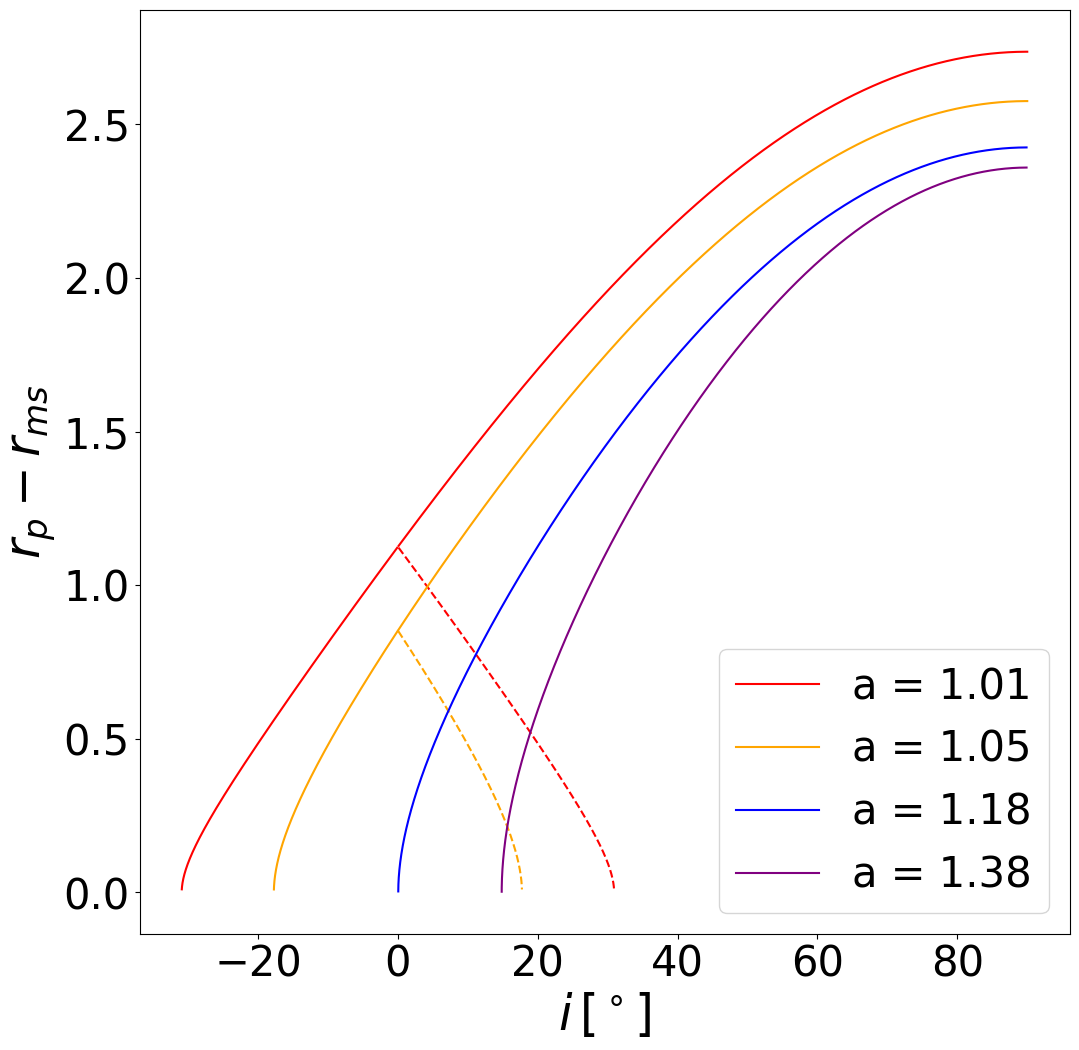

In [ ]:
iarr1 = np.linspace(1e-1, 90, 30000) # 1.01
iarr2 = np.linspace(5*1e-2, 90, 30000) # 1.05
iarr3 = np.linspace(89.9, 5*1e-2, 30000) # 1.18
iarr4 = np.linspace(89.9, 14.8417, 30000) # 1.38

fig, ax = plt.subplots(1, 1)

ax.plot(-iarr1[:np.size(rminarr1)], rminarr1 - rms2(1.01), color = "red", label = "a = 1.01")
ax.plot(iarr1[:np.size(rminarr1)], rminarr1 - rms2(1.01), linestyle = "dashed", color = "red")
ax.plot(iarr1, rmaxarr1 - rms2(1.01), color = "red")

ax.plot(-iarr2[1:np.size(rminarr2)], rminarr2[1:] - rms2(1.05), color = "orange", label = "a = 1.05")
ax.plot(iarr2[1:np.size(rminarr2)], rminarr2[1:] - rms2(1.05), linestyle = "dashed", color = "orange")
ax.plot(iarr2, rmaxarr2[1:] - rms2(1.05), color = "orange")


ax.plot(iarr3, rmaxarr3[1:] - rms2(1.18), color = "blue", label = "a = 1.18")
ax.plot(iarr4, rmaxarr4[1:] - rms2(1.38), color = "purple", label = "a = 1.38")

ax.set_xlabel(r"$i \, [^\circ]$")
ax.set_ylabel(r"$r_p - r_{ms}$")

ax.legend(loc = "lower right", fontsize = 30)

## Figure 2: Shadow Geometry on Spin-Inclination Phase Space

See shadow visualizations in section 2 below to see what it means by "no gap" (closed shadow), "gap" (open shadow) and "no shadow".

Here, we demonstrate the KNS shadow geometry depending on different spins a and observational inclination i.

Text(34, 1.6, 'C: No shadow')

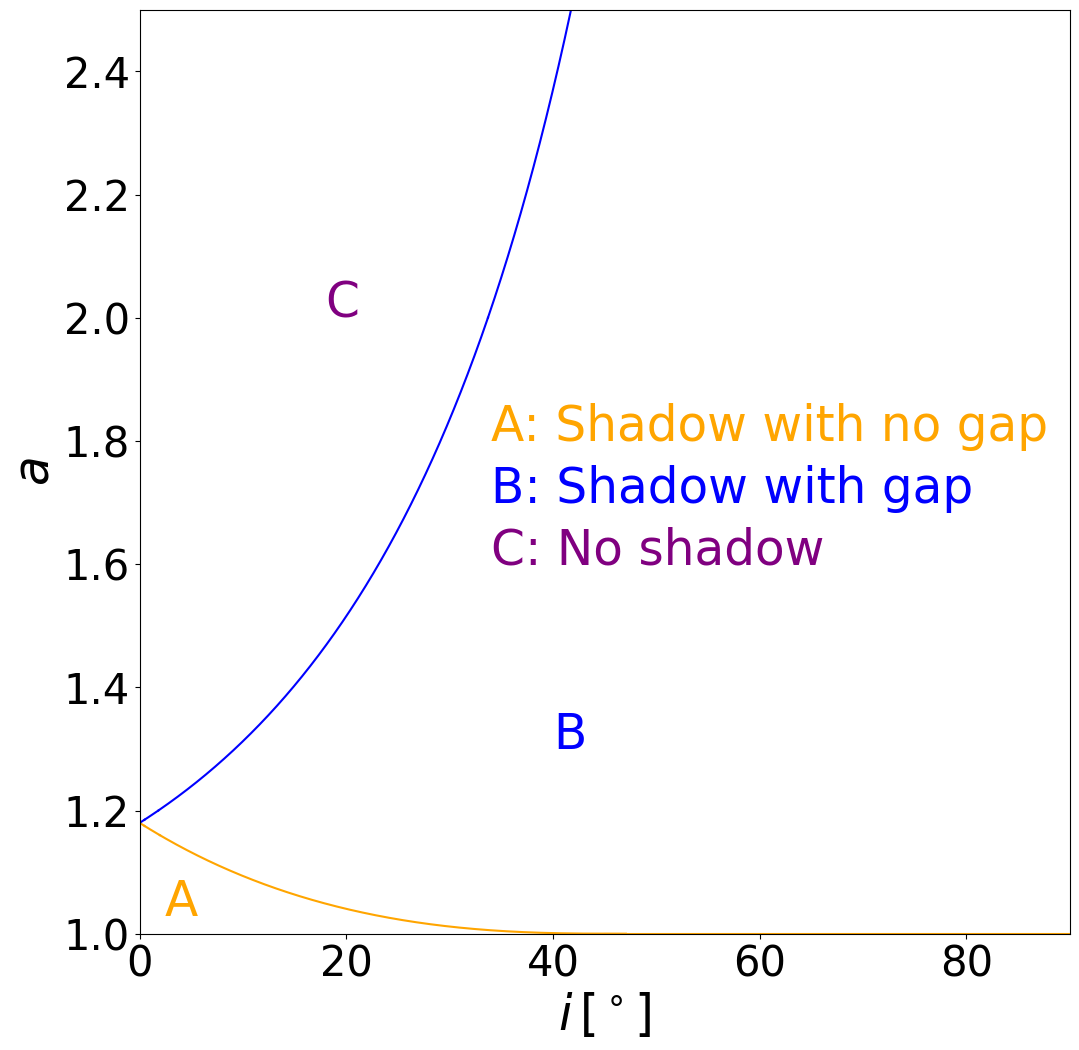

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(iarr1*180/np.pi, aarr1, color = "orange")
ax.plot(iarr2*180/np.pi, aarr2, color = "blue")
ax.plot(iarr3*180/np.pi, aarr3[0: np.size(iarr3)], color = "orange")
ax.plot(iarr4*180/np.pi, aarr4, color = "blue")
ax.plot(iarr5*180/np.pi, aarr5, color = "orange")
ax.plot(iarr6*180/np.pi, aarr6, color = "blue")
ax.plot(iarr7*180/np.pi, aarr7, color = "blue")
ax.plot(np.linspace(45, 90, 100), np.ones(100), color = "orange")

ax.set_xlabel(r"$i \, [^\circ]$")
ax.set_ylabel(r"$a$")
ax.set_xlim(0, 90)
ax.set_ylim(1, 2.5)

plt.text(2.4, 1.03, 'A', fontsize = 35, color = 'orange')
plt.text(40, 1.3, 'B', fontsize = 35, color = 'blue')
plt.text(18, 2, 'C', fontsize = 35, color = 'purple')

plt.text(34, 1.8, 'A: Shadow with no gap', fontsize = 35, color = 'orange')
plt.text(34, 1.7, 'B: Shadow with gap', fontsize = 35, color = 'blue')
plt.text(34, 1.6, 'C: No shadow', fontsize = 35, color = 'purple')

# 2. KNS Shadow


Methods for plotting shadow on the observer's image plane:

In [80]:
def shadow(aspin, inc): # method to plot the shadow on the observer's image plane
    if abs(aspin) <= 1:
        r1 = rph1(aspin)
    else:
        r1 = (aspin*aspin - 1)**(1/3) + 1

    rs = np.linspace(r1+1e-10, rph2(aspin), num=100000)
    if abs(aspin) > 1:
        rs = np.concatenate([np.array([np.nan]), rs])

    a = np.array([PHI(aspin, r) / np.sin(inc) for r in rs])
    b = np.array([np.sqrt(Q(aspin, r) + (aspin * np.cos(inc))**2 - (PHI(aspin, r) / np.tan(inc))**2) for r in rs])

    # a-b coordinates on the observer's image plane is analogous to x-y axis in Cartesian

    return (
        np.concatenate([-a, -a[::-1], -a[:1]]),
        np.concatenate([ b, -b[::-1],  b[:1]]),
    )

### Create and export analytical KNS shadow projection file:
### Skip this - the files can be accessed in this [Google Drive folder](https://drive.google.com/drive/folders/1Q6jmV7chc-Qu36vRZnY_tMGAi9Ve4RZq?usp=share_link).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def save_shadow(a, i):

  # access file in drive
  file = f'/content/drive/My Drive/Colab Notebooks/Shadow/shadow_a{a:.2f}_i{i:g}.h5'

  (alpha, beta) = shadow(a, i*np.pi/180)

  # save turning number array in Drive
  with h5py.File(file, 'w') as h:
    h.create_dataset('a', data=alpha)
    h.create_dataset('b', data=beta)

In [ ]:
n = 19
a1 = np.array([1.        , 1.02825094, 1.05570376, 1.08238102, 1.10830462,
       1.13349585, 1.15797541, 1.18176339, 1.20487934, 1.22734225,
       1.24917056, 1.27038219, 1.3, 1.325, 1.35,
       1.375, 1.39, 1.40, 1.403])
a2 = np.linspace(1, 2, n)
a3 = np.linspace(1, 2, n)

i1 = 15
i2 = 45
i3 = 90

In [ ]:
for a in a1:
  save_shadow(a, i1)

for a in a2:
  save_shadow(a, i2)

for a in a3:
  save_shadow(a, i3)

## Figure 3-4. KNS Shadow Visualizations for different spin and inclination

The files can be accessed in this [Google Drive folder](https://drive.google.com/drive/folders/1Q6jmV7chc-Qu36vRZnY_tMGAi9Ve4RZq?usp=share_link).

In [ ]:
def import_ab(a, i, cond):
    file = f'/content/drive/My Drive/Colab Notebooks/Shadow/shadow_a{a:.2f}_i{i:g}.h5' # change this to your local folder
    with h5py.File(file) as h:
      alpha = h['a'][:]
      beta = h['b'][:]

    if cond:
      index_apos = np.where(alpha > 0)[0]
      aright = index_apos[beta[index_apos].argmin()]

      for bb in np.linspace(-10e-3, 10e-3, 10):
        alpha = np.append(alpha, alpha[aright])
        beta = np.append(beta, bb)

    return (alpha, beta)

Below are some KNS shadow visualizations for different spin a and observational inclination angle i. The geometric features visualized here (closed shadow, open shadow, no shadow) are consistent with the spin-inclination phase space in section 1.2.

See section 2.2 of [Nguyen et al. 2023](https://iopscience.iop.org/article/10.3847/1538-4357/ace697) for a discussion of this section.

Text(6.5, 4.5, '$a = 2$')

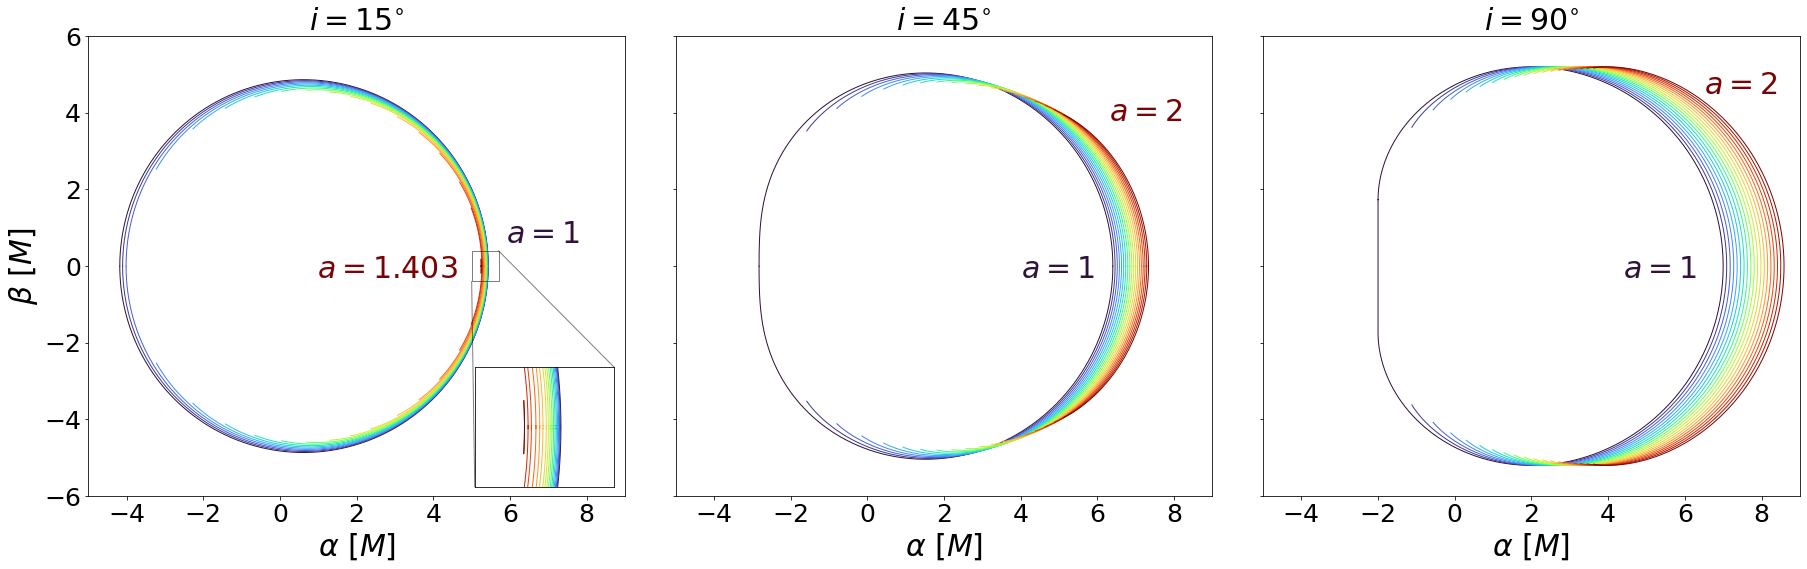

In [ ]:
n = 19
a1 = np.array([1.        , 1.02825094, 1.05570376, 1.08238102, 1.10830462,
       1.13349585, 1.15797541, 1.18176339, 1.20487934, 1.22734225,
       1.24917056, 1.27038219, 1.3, 1.325, 1.35,
       1.375, 1.39, 1.40, 1.403])
a2 = np.linspace(1, 2, n)
a3 = np.linspace(1, 2, n)

i1 = 15
i2 = 45
i3 = 90

colors = plt.cm.turbo(np.linspace(0,1,n))

fig, axes = plt.subplots(1,3, figsize=(25,8), sharex=True, sharey=True)
fig.tight_layout()
for k in range(3):
    axes[k].set_xlim(-5,9)
    axes[k].set_ylim(-6,6)
    axes[k].set_xlabel(r'$\alpha$ [$M$]', fontsize = 30)
    axes[k].set_aspect('equal')
axes[0].set_ylabel(r'$\beta$ [$M$]', fontsize = 30)

axes[0].set_title(r"$i = 15^{\circ}$", fontsize = 30)
axes[1].set_title(r"$i = 45^{\circ}$", fontsize = 30)
axes[2].set_title(r"$i = 90^{\circ}$", fontsize = 30)

axins = axes[0].inset_axes([0.72, 0.02, 0.26, 0.26])

for k in range(n):
    alpha1, beta1 = import_ab(a1[k], i1, True)
    alpha2, beta2 = import_ab(a2[k], i2, False)
    alpha3, beta3 = import_ab(a3[k], i3, False)

    axes[0].plot(alpha1, beta1, color = colors[k], linewidth = 1)
    axins.plot(alpha1, beta1, color = colors[k], linewidth = 1)
    axes[1].plot(alpha2, beta2, color = colors[k], linewidth = 1)
    axes[2].plot(alpha3, beta3, color = colors[k], linewidth = 1)

x1, x2, y1, y2 = 5, 5.7, -0.4, 0.4
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([], [])
axins.set_yticks([], [])
axes[0].indicate_inset_zoom(axins, edgecolor="black")

#plt.title(r"$\theta_i$ = "+f'{i}$^\circ$', fontsize = 20)
axes[0].text(5.9, 0.6, r'$a = 1$', fontsize = 30, color = colors[0])
axes[0].text(0.96, -0.3, r'$a = 1.403$', fontsize = 30, color = colors[-1])

axes[1].text(4, -0.3, r'$a = 1$', fontsize = 30, color = colors[0])
axes[1].text(6.3, 3.8, r'$a = 2$', fontsize = 30, color = colors[-1])

axes[2].text(4.4, -0.3, r'$a = 1$', fontsize = 30, color = colors[0])
axes[2].text(6.5, 4.5, r'$a = 2$', fontsize = 30, color = colors[-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


Text(5.9, 4.5, '$i = 90^{\\circ}$')

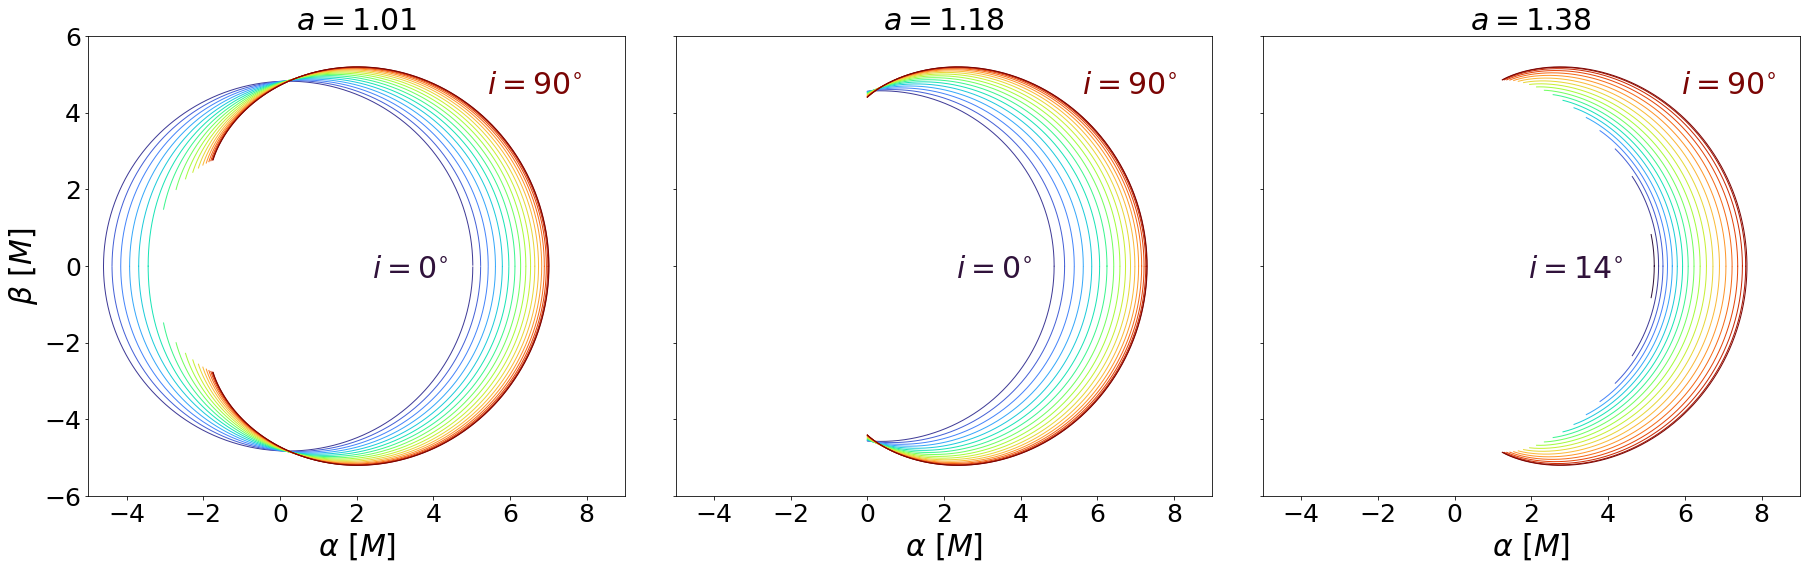

In [ ]:
n = 19
iarr = np.linspace(1e-10, 90, 19)*np.pi/180 # i = 0, 5, 10, ..., 90 deg
iarr2 = np.logspace(np.log10(14), np.log10(90), 19)*np.pi/180 # starting at i = 13.82 where the shadow starts to exist for a = 1.38
colors = plt.cm.turbo(np.linspace(0,1,n))

fig, axes = plt.subplots(1,3, figsize=(25,8), sharex=True, sharey=True)
fig.tight_layout()
for k in range(3):
    axes[k].set_xlim(-5,9)
    axes[k].set_ylim(-6,6)
    axes[k].set_xlabel(r'$\alpha$ [$M$]', fontsize = 30)
    axes[k].set_aspect('equal')
axes[0].set_ylabel(r'$\beta$ [$M$]', fontsize = 30)

axes[0].set_title(r"$a = 1.01$", fontsize = 30)
axes[1].set_title(r"$a = 1.18$", fontsize = 30)
axes[2].set_title(r"$a = 1.38$", fontsize = 30)

for k in range(n):
    axes[0].plot(*shadow(aspin = 1.01, inc = iarr[k]), color = colors[k], linewidth = 1) # no gap and gap are possible
    axes[1].plot(*shadow(aspin = 1.18, inc = iarr[k]), color = colors[k], linewidth = 1) # only no gap
    axes[2].plot(*shadow(aspin = 1.38, inc = iarr2[k]), color = colors[k], linewidth = 1) # no shadow and gap are possible

axes[0].text(2.4, -0.3, r'$i = 0^{\circ}$', fontsize = 30, color = colors[0])
axes[0].text(5.4, 4.5, r'$i = 90^{\circ}$', fontsize = 30, color = colors[-1])

axes[1].text(2.3, -0.3, r'$i = 0^{\circ}$', fontsize = 30, color = colors[0])
axes[1].text(5.6, 4.5, r'$i = 90^{\circ}$', fontsize = 30, color = colors[-1])

axes[2].text(1.9, -0.3, r'$i = 14^{\circ}$', fontsize = 30, color = colors[0])
axes[2].text(5.9, 4.5, r'$i = 90^{\circ}$', fontsize = 30, color = colors[-1])

## Connection Between Effective Angular Momentum $\Phi$ and KNS **Shadow**

As discussed in section 1, we have $\Phi = L_z/E$ where $L_z$ is the azimuthal angular momentum and $E$ is the energy. $\Phi$ can be treated as the effective angular momentum for spherical photon orbit radius r as follow:

$$\Phi = -\frac{r^3 - 3r^2 + a^2r + a^2}{a(r-1)}$$

From [Bardeen et al. 1972](https://articles.adsabs.harvard.edu/full/1972ApJ...178..347B), the relations between these parameters with the orthogonal coordinates of the image plane at infinity are:

$$\alpha = -\Phi \csc i$$

$$\beta = \pm \sqrt{Q + a^2 \cos^2 i - \Phi^2 \cot^2 i}$$

Here, $a$ is the dimensionless spin and $i$ is the observational inclination angle.

In this section, we analyze $\Phi$ to gain physical insights into the gap opening behavior of KNS shadow. The general idea is that as the KNS spin increases, the maximum $\Phi$ for an orbit to sustain spherical orbit decreases. Because if the photon has too much angular momentum, then it will get scattered off due to the large spin of the KNS. See figure 5 for how the maximum $\Phi$ changes according to increasing spin.


In [ ]:
def phi_projection(aspin, i):

    inc = i*np.pi/180
    (a,b) = shadow(aspin = aspin, inc = inc)
    Phi = -a*np.sin(inc)

    fig, ax = plt.subplots(1,1, figsize=(8,8), sharex=True, sharey=True)
    fig.tight_layout()
    ax.set_xlim(-8,10)
    ax.set_ylim(-8,8)
    ax.set_xlabel(r'$\alpha$ [$M$]', fontsize = 30)
    ax.set_aspect('equal')
    ax.set_ylabel(r'$\beta$ [$M$]', fontsize = 30)

    ax.set_title(r"$a = " + str(np.round(aspin, 2)) + ", i = " + str(i) + "{\circ}$", fontsize = 30)
    print(aspin, i, np.nanmin(a))
    print(aspin, i, np.nanmax(Phi))

    im = ax.scatter(a, b, c = Phi, cmap = plt.cm.turbo, linewidth = 5) # no gap and gap are possible
    cax  = fig.add_axes([1.01, 0.05, 0.02, 1])
    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label(label=r'$\Phi$', fontsize = 25, labelpad = 10)

In [ ]:
maxPhi = np.array([])

for aspin in np.arange(0.01, 2.01, 0.005):
  (a,b) = shadow(aspin = aspin, inc = 3)
  Phi = -a*np.sin(3)
  maxPhi = np.append(np.nanmax(Phi), maxPhi)

<ipython-input-1-023774081d4f>:39: RuntimeWarning: invalid value encountered in sqrt
  b = np.array([np.sqrt(Q(aspin, r) + (aspin * np.cos(inc))**2 - (PHI(aspin, r) / np.tan(inc))**2) for r in rs])


## Figure 5. Maximum $\Phi$ as a function of spin

The main takeaway here is that the maximum effective angular momentum $\Phi_{max}$ is 0 at spin a ~ 1.18, corresponding to when the KNS shadow can no longer be closed. The physical consequence of this is discussed further after this section.

Text(0.58, 0.102, '1.18')

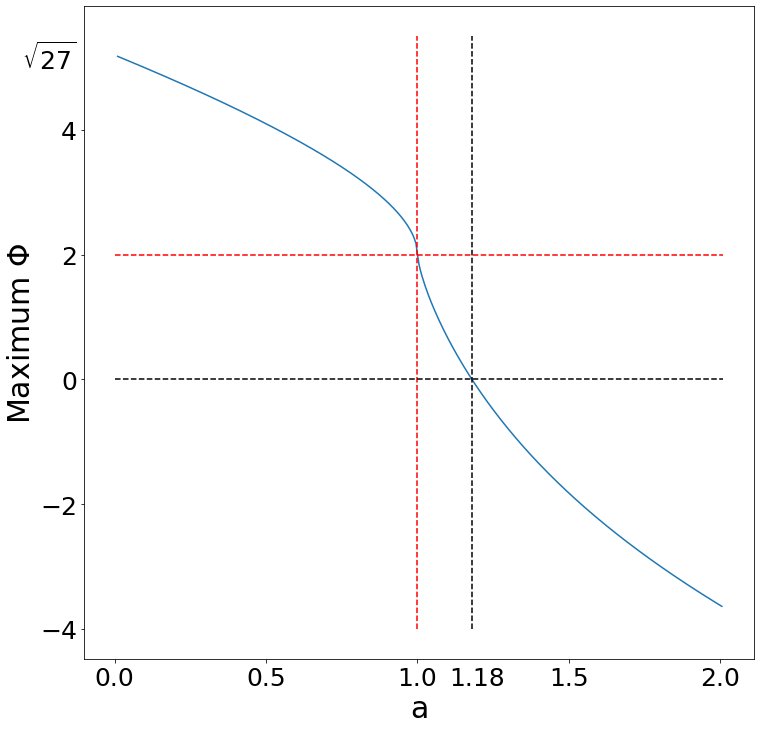

In [ ]:
aarr = np.arange(0.01, 2.01, 0.005)
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
ax.plot(aarr, np.flip(maxPhi))
ax.vlines(1.18, -4, 5.5, linestyles = "dashed", color = "black")
ax.vlines(1, -4, 5.5, linestyles = "dashed", color = "red")
ax.hlines(0, 0, 2.01, linestyles = "dashed", color = "black")
ax.hlines(2, 0, 2.01, linestyles = "dashed", color = "red")
ax.set_xlabel("a")
ax.set_ylabel(r"Maximum $\Phi$")
fig.text(0.085, 0.82, r'$\sqrt{27}$', ha='center', va='center', fontsize = 25)
fig.text(0.58, 0.102, r'1.18', ha='center', va='center', fontsize = 25)

## Figure 6-7. KNS Shadows with different spin and inclination, color coded by the effective angular momentum $\Phi$ of the projected light orbits

See section 2.3 of [Nguyen et al. 2023](https://iopscience.iop.org/article/10.3847/1538-4357/ace697) for a discussion of this section.

Essentially, for a fixed spin as the inclination increases from face-on to edge-on, the photons have greater (in magnitude) effective angular momentum because it gains motion in the $\phi$ direction.

For a fixed spin 1 < a <~ 1.18, as the inclination increases, the prograde photon trajectories become more prograde. At some higher inclination angle, their effective angular momentum exceeds $\Phi_{max}$ so they can no longer sustain spherical orbits around the KNS. Thus, the shadow opens up its gap at higher inclinations.

For a fixed spin a >~ 1.18, as $\Phi_{max}$ < 0, retrograde photon orbits at lower inclination might exceed the $\Phi_{max}$, so the shadow vanishes. As the inclination increases, the retrograde photon orbits become more retrograde, so they can resist the KNS spin effects and fall below Fmax, allowing them to orbit the KNS and the shadow to reemerge again.

<ipython-input-1-023774081d4f>:39: RuntimeWarning: invalid value encountered in sqrt
  b = np.array([np.sqrt(Q(aspin, r) + (aspin * np.cos(inc))**2 - (PHI(aspin, r) / np.tan(inc))**2) for r in rs])


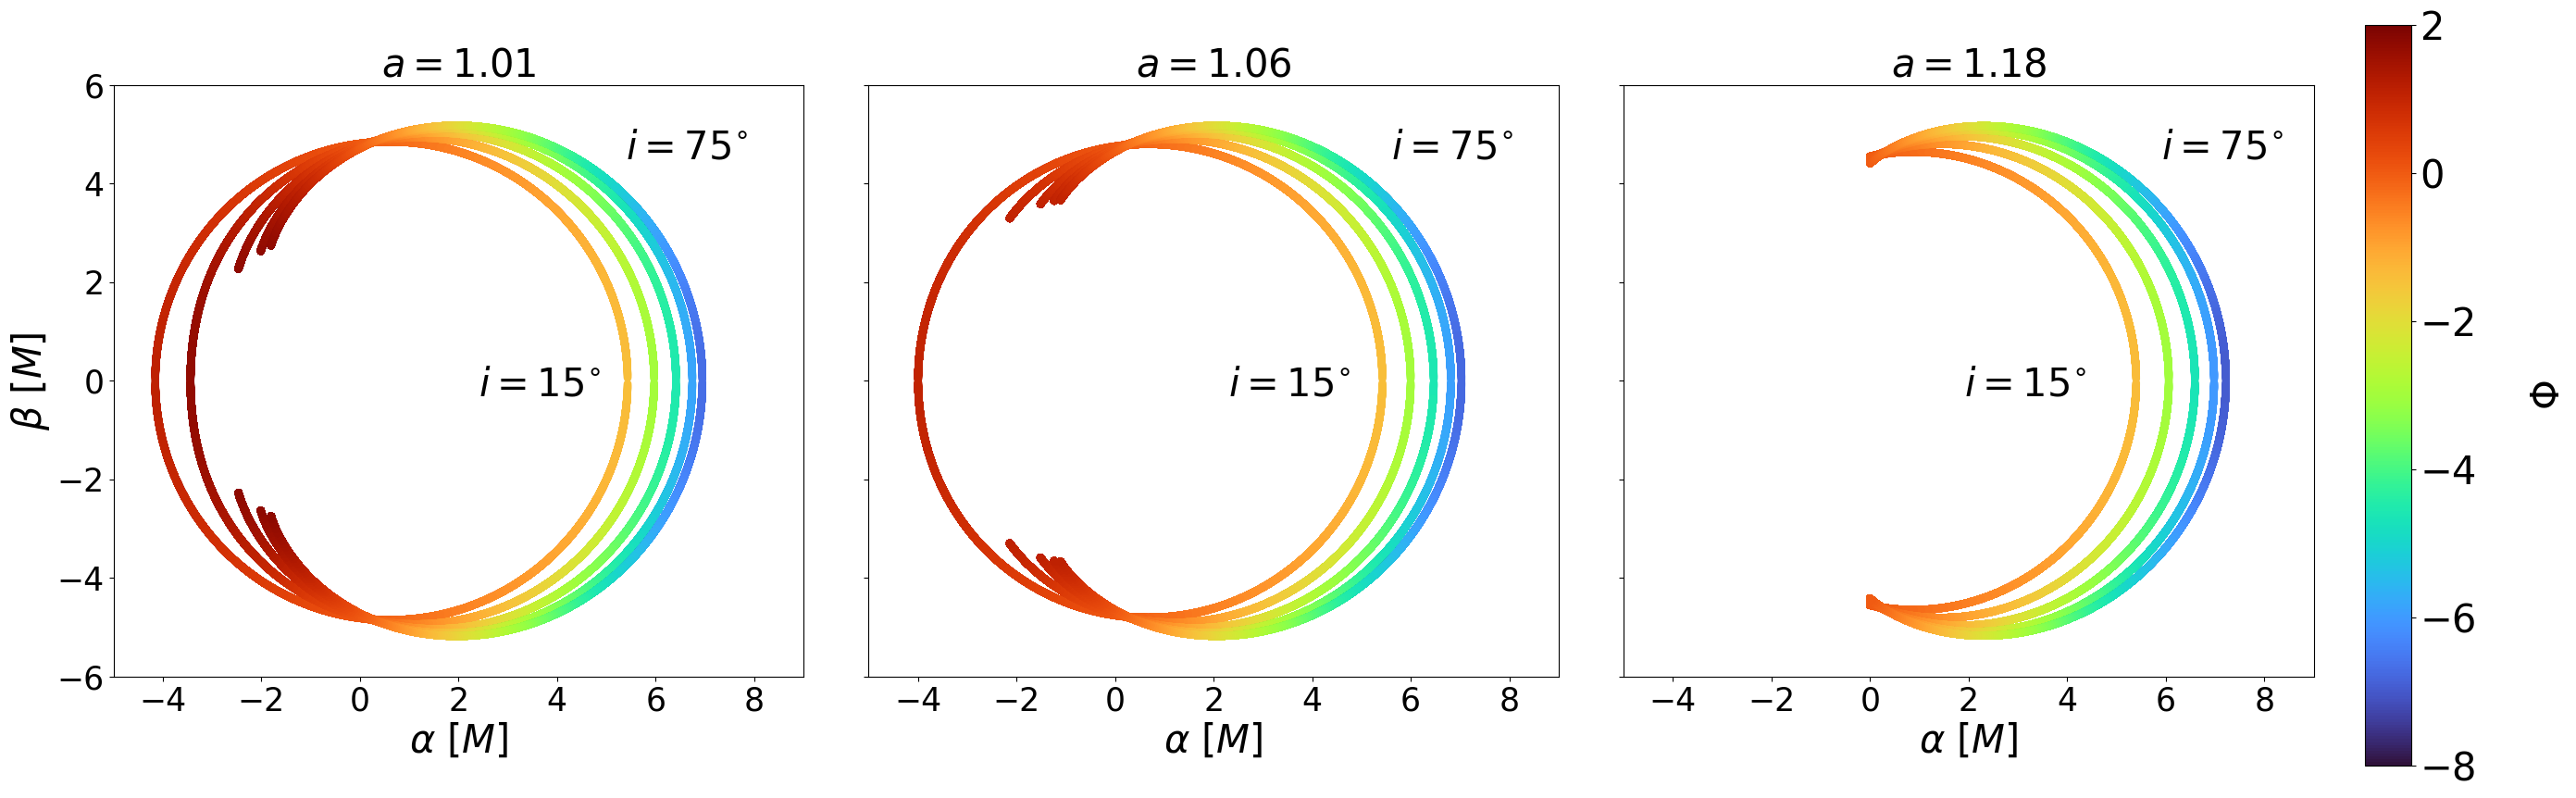

In [ ]:
n = 5
iarr = np.array([15, 30, 45, 60, 75])

fig, axes = plt.subplots(1,3, figsize=(25,8), sharex=True, sharey=True)
fig.tight_layout()
for k in range(3):
    axes[k].set_xlim(-5,9)
    axes[k].set_ylim(-6,6)
    axes[k].set_xlabel(r'$\alpha$ [$M$]', fontsize = 30)
    axes[k].set_aspect('equal')
axes[0].set_ylabel(r'$\beta$ [$M$]', fontsize = 30)

axes[0].set_title(r"$a = 1.01$", fontsize = 30)
axes[1].set_title(r"$a = 1.06$", fontsize = 30)
axes[2].set_title(r"$a = 1.18$", fontsize = 30)

for k in range(n):
    inc = iarr[k]*np.pi/180
    (a,b) = shadow(aspin = 1.01, inc = inc)
    Phi = -a*np.sin(inc)
    im = axes[0].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -8, vmax = 2, linewidth = 0.1)

    (a,b) = shadow(aspin = 1.06, inc = inc)
    Phi = -a*np.sin(inc)
    im = axes[1].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -8, vmax = 2, linewidth = 0.1)

    (a,b) = shadow(aspin = 1.1799, inc = inc)
    Phi = -a*np.sin(inc)
    im = axes[2].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -8, vmax = 2, linewidth = 0.1)

axes[0].text(2.4, -0.3, r'$i = 15^{\circ}$', fontsize = 30)
axes[0].text(5.4, 4.5, r'$i = 75^{\circ}$', fontsize = 30)

axes[1].text(2.3, -0.3, r'$i = 15^{\circ}$', fontsize = 30)
axes[1].text(5.6, 4.5, r'$i = 75^{\circ}$', fontsize = 30)

axes[2].text(1.9, -0.3, r'$i = 15^{\circ}$', fontsize = 30)
axes[2].text(5.9, 4.5, r'$i = 75^{\circ}$', fontsize = 30)

cax  = fig.add_axes([1.005, 0, 0.02, 1])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label(label=r'$\Phi$', fontsize = 30, labelpad = 40)

<ipython-input-1-023774081d4f>:39: RuntimeWarning: invalid value encountered in sqrt
  b = np.array([np.sqrt(Q(aspin, r) + (aspin * np.cos(inc))**2 - (PHI(aspin, r) / np.tan(inc))**2) for r in rs])


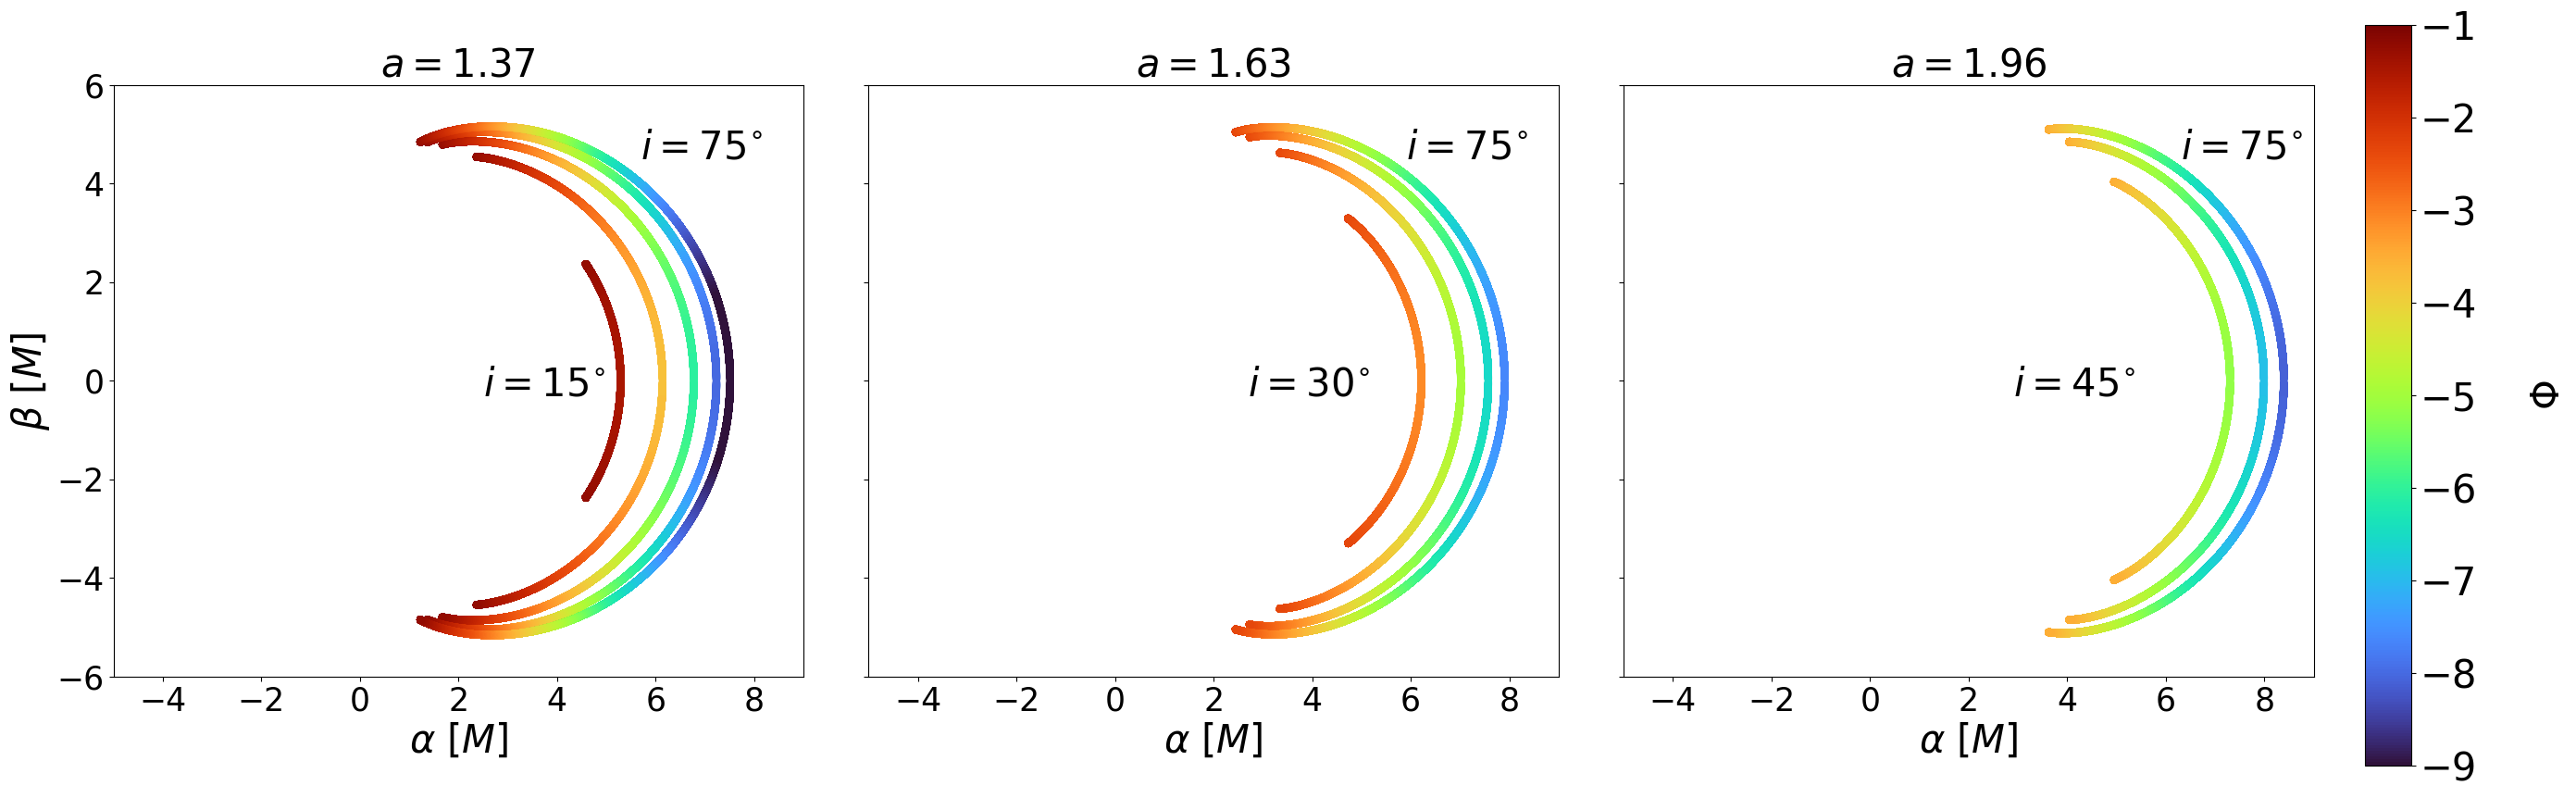

In [ ]:
n = 5
iarr = np.array([15, 30, 45, 60, 75])

fig, axes = plt.subplots(1,3, figsize=(25,8), sharex=True, sharey=True)
fig.tight_layout()
for k in range(3):
    axes[k].set_xlim(-5,9)
    axes[k].set_ylim(-6,6)
    axes[k].set_xlabel(r'$\alpha$ [$M$]', fontsize = 30)
    axes[k].set_aspect('equal')
axes[0].set_ylabel(r'$\beta$ [$M$]', fontsize = 30)

axes[0].set_title(r"$a = 1.37$", fontsize = 30)
axes[1].set_title(r"$a = 1.63$", fontsize = 30)
axes[2].set_title(r"$a = 1.96$", fontsize = 30)

for k in range(n):
    inc = iarr[k]*np.pi/180
    (a,b) = shadow(aspin = 1.37, inc = inc)
    Phi = -a*np.sin(inc)
    im = axes[0].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -7, vmax = -1, linewidth = 0.1)

    (a,b) = shadow(aspin = 1.63, inc = inc)
    Phi = -a*np.sin(inc)
    im = axes[1].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -9, vmax = -1, linewidth = 0.1)

    (a,b) = shadow(aspin = 1.96, inc = inc)
    Phi = -a*np.sin(inc)
    im = axes[2].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -9, vmax = -1, linewidth = 0.1)

axes[0].text(2.5, -0.3, r'$i = 15^{\circ}$', fontsize = 30)
axes[0].text(5.7, 4.5, r'$i = 75^{\circ}$', fontsize = 30)

axes[1].text(2.7, -0.3, r'$i = 30^{\circ}$', fontsize = 30)
axes[1].text(5.9, 4.5, r'$i = 75^{\circ}$', fontsize = 30)

axes[2].text(2.9, -0.3, r'$i = 45^{\circ}$', fontsize = 30)
axes[2].text(6.3, 4.5, r'$i = 75^{\circ}$', fontsize = 30)

cax  = fig.add_axes([1.005, 0, 0.02, 1])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label(label=r'$\Phi$', fontsize = 30, labelpad = 40)

Below, the same visualizations is plot for black holes (a < 1) for comparison.

<ipython-input-1-023774081d4f>:39: RuntimeWarning: invalid value encountered in sqrt
  b = np.array([np.sqrt(Q(aspin, r) + (aspin * np.cos(inc))**2 - (PHI(aspin, r) / np.tan(inc))**2) for r in rs])


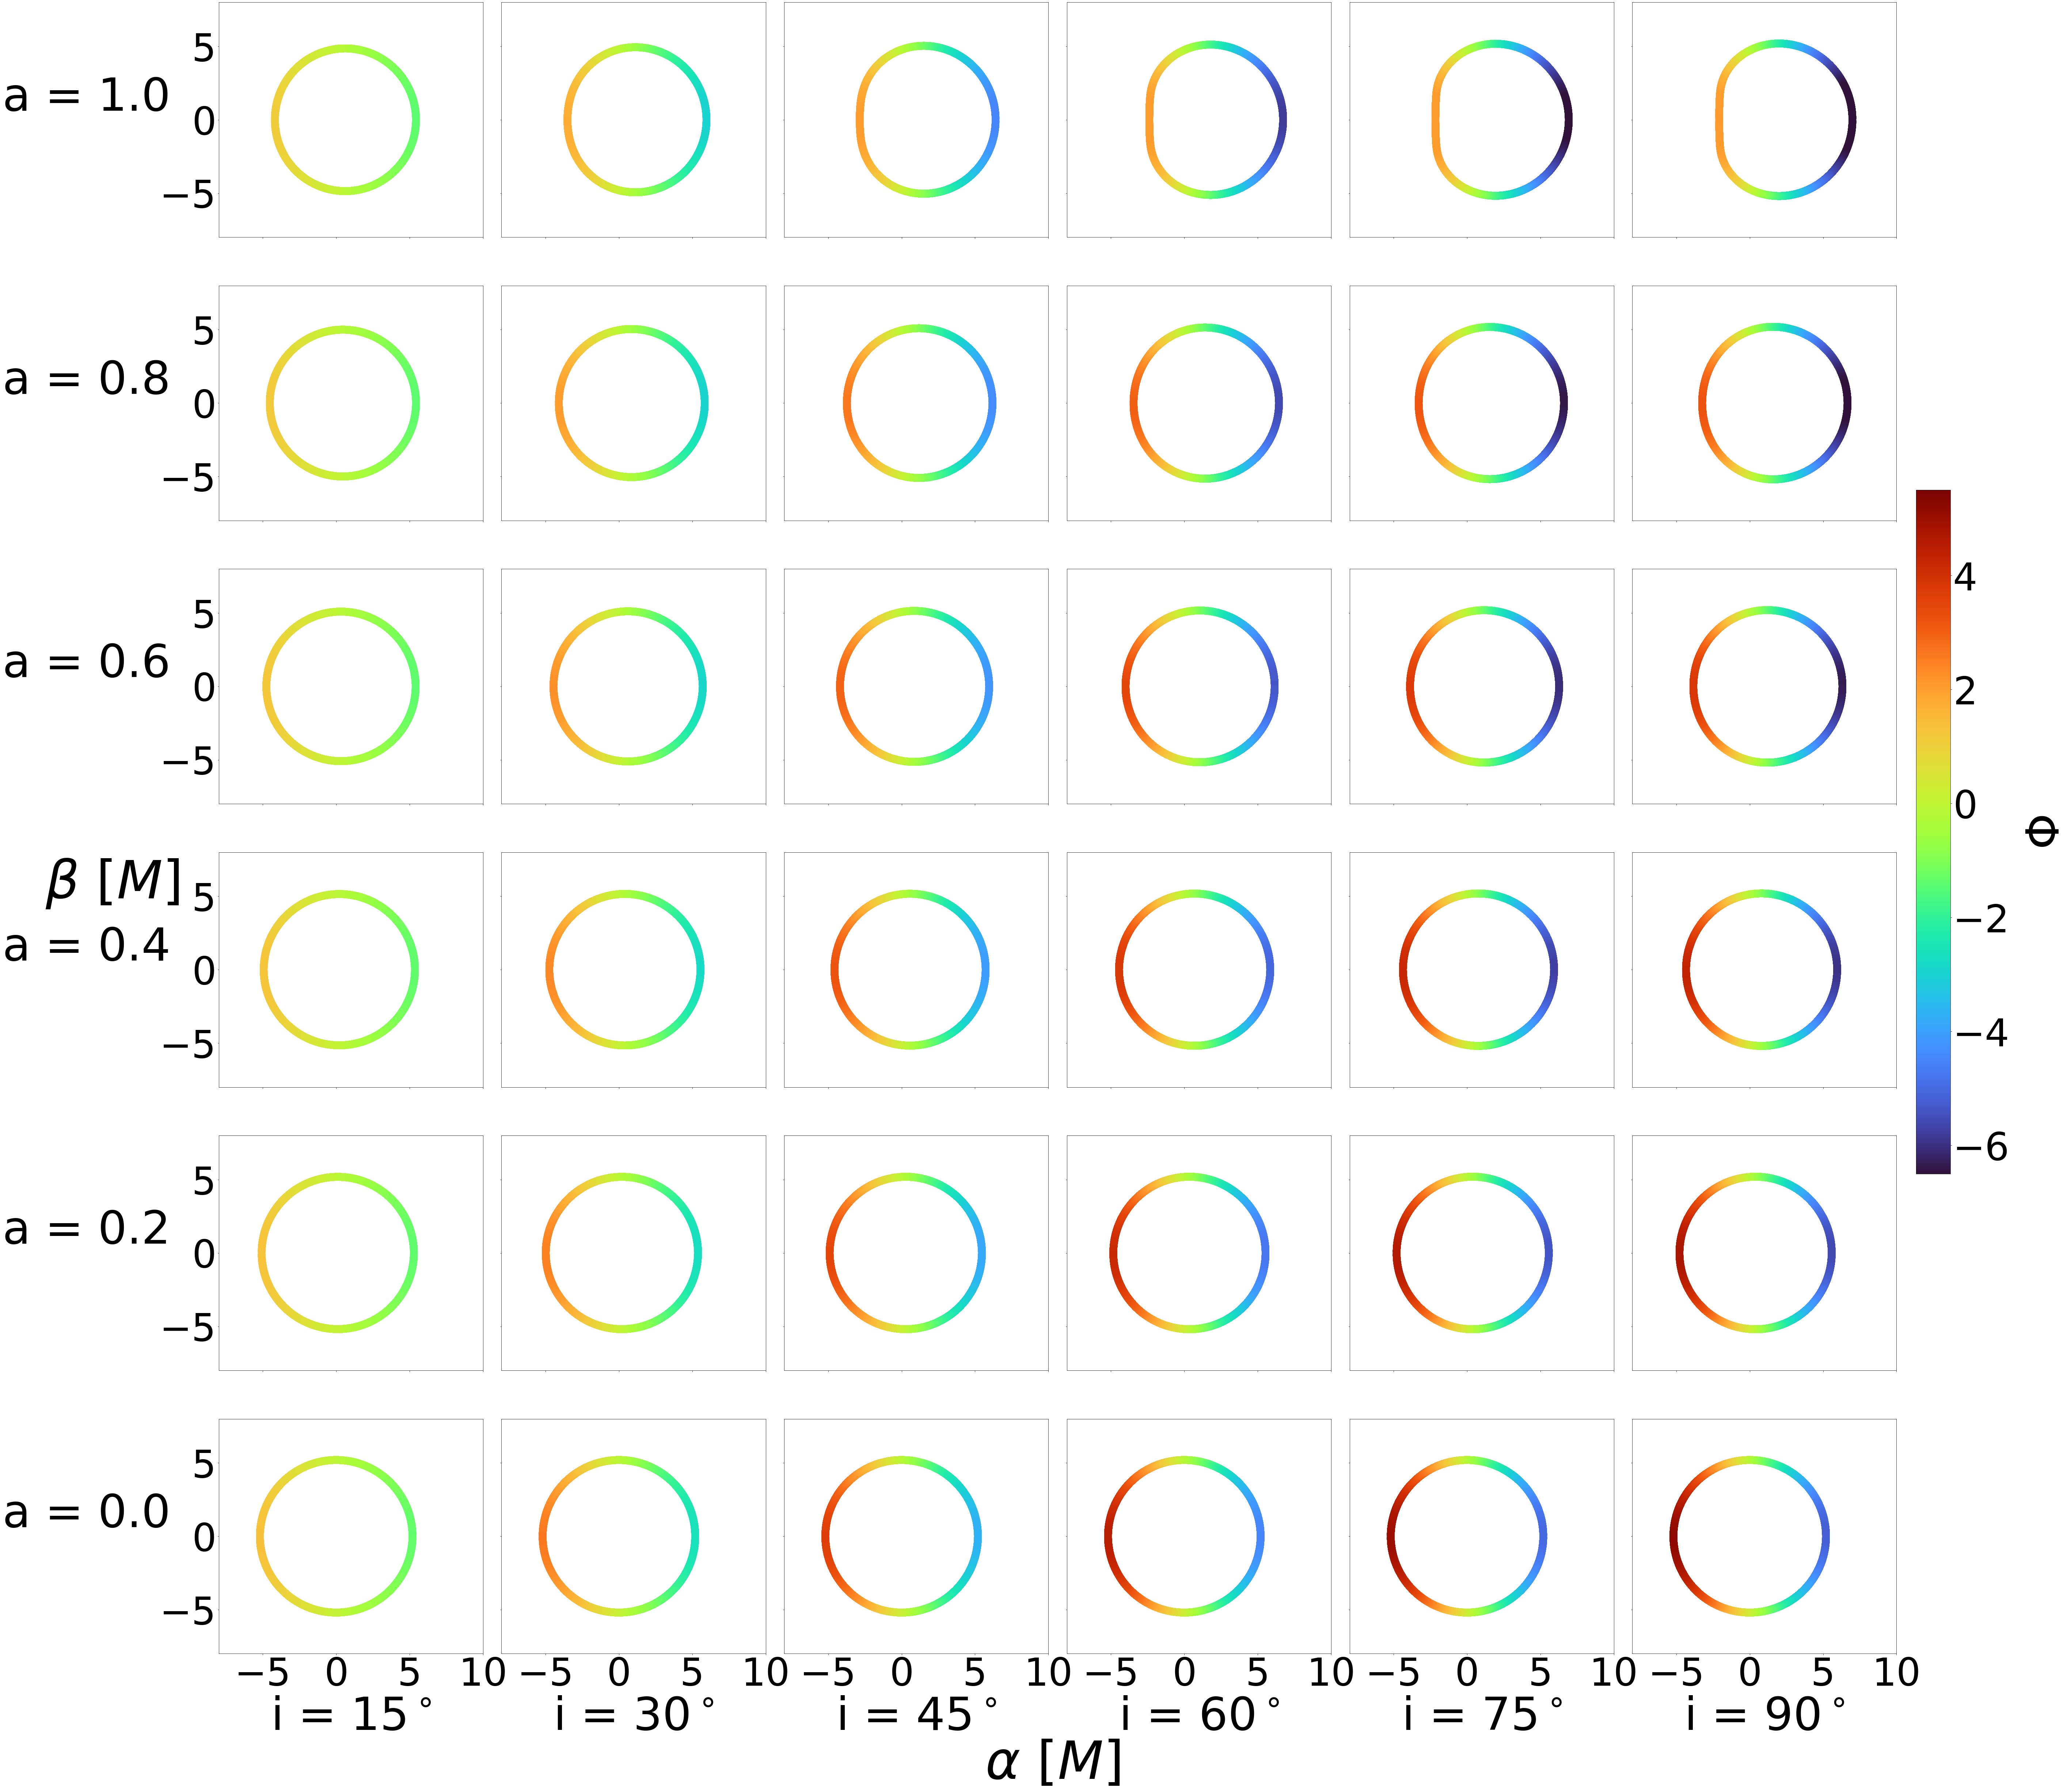

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 6, figsize = (65, 65), sharex=True, sharey=True)
aarr = np.array([0.999, 0.8, 0.6, 0.4, 0.2, 0.0001])
iarr = np.array([15, 30, 45, 60, 75, 90])
fig.tight_layout()
for m in range(6):
    axes[m,0].set_ylabel("a = "+str(np.round(aarr[m], 2)), fontsize=125, rotation = 'horizontal', labelpad = 200)
    axes[5,m].set_xlabel(r"i = "+str(np.round(iarr[m], 0))+"$^\circ$", fontsize=125)
    for n in range(6):
      axes[m,n].set_xlim(-8,10)
      axes[m,n].set_ylim(-8, 8)
      axes[m,n].set_aspect('equal')
      axes[m,n].tick_params(axis='both', labelsize=105)
      inc = iarr[n]*np.pi/180
      (a,b) = shadow(aspin = aarr[m], inc = inc)
      Phi = -a*np.sin(inc)
      im = axes[m,n].scatter(a, b, c = Phi, cmap = plt.cm.turbo, vmin = -6.5, vmax = 5.5, linewidth = 15)

plt.locator_params(nbins=5)

fig.text(0.5, -0.045, r'$\alpha$ [$M$]', ha='center', va='center', fontsize = 145)
fig.text(-0.05, 0.47, r'$\beta$ [$M$]', ha='center', va='center', rotation='horizontal', fontsize = 145)

cax  = fig.add_axes([1.005, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=105)
cbar.set_label(label=r'$\Phi$', fontsize = 125, labelpad = 40)

# 3. Numerical Deflection Angle Plots

To verify the analytical calculations in previous section, we run numerical ray-tracing simulations for KNS. We calculate the deflection angle of each light rays, projected on the image plane like in previous section.

## Figure 8. Numerical Ray-Tracing Set Up

Below is the numerical ray-tracing setup.

The orange ring represents the KNS centered at the origin.

The blue square grid represents the image plane, which is located at very faraway from the KNS at a polar inclination angle i with respect to the normal of the ring singularity.

The brown circles represent the photons, which are spaced equally from each other on a grid of 128 × 160.

See section 3.1 of [Nguyen et al. 2023](https://iopscience.iop.org/article/10.3847/1538-4357/ace697) for further discussion on the numerical set-up.

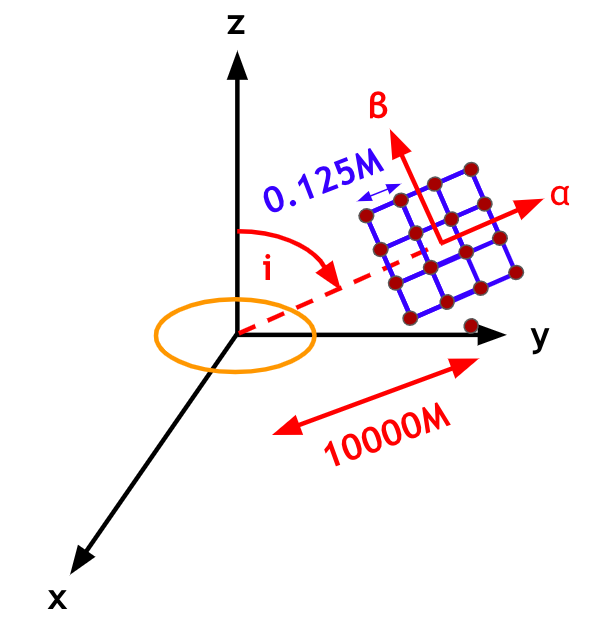

The key idea is that for unstable SPOs, the projection corresponds to the region where light rapidly oscillates between high deflection angles and low deflection angles. In the color scheme we choose below, this is the region where the color rapidly alternates between blue and red.

We plot the analytical shadow projection on top of the numerical deflection angle results to illustrate how to interpret the shadow from the plot.

The numerical ray tracing files used in the code below can be found in these Google Drive folders: [folder 1](https://drive.google.com/drive/folders/1rf3sJYAaA1oZ0MdApU7lEoX8AFjj61Tt?usp=share_link) and [folder 2](https://drive.google.com/drive/folders/15yucGFDEeBbHVHDmKAMDYxW8lyUAxNCA?usp=share_link)

In [71]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from jax       import numpy as np

from matplotlib import pyplot as plt
from itertools  import product
from scipy.signal import argrelextrema
import seaborn as sb

import jax
import h5py
import math
from jax import jit, lax, jacfwd

from os   import mkdir, path
from glob import glob

from google.colab import drive
drive.mount('/content/drive')

plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.figsize'] = (12,12)

<ipython-input-71-78c506bbcda8>:4: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
alpha = 16*((np.arange(1024)+0.5)/1024-0.5)

def da(f):
    k  = f[:,1]
    ki = k[-1,1:]
    kf = k[ 0,1:]

    fi = np.einsum('ijk,ijk->jk', kf, ki)
    ff = np.einsum('ijk,ijk->jk', kf, kf)
    ii = np.einsum('ijk,ijk->jk', ki, ki)

    return np.arccos(fi / np.sqrt(ff * ii))

def argmax(d):
    am = argrelextrema(d, np.greater)[0]
    am = np.array([a for a in am if max(d[a+1]-d[a], d[a]-d[a-1]) > 0.02])
    return am

def argmin(d):
    am = argrelextrema(d, np.less)[0]
    am = np.array([a for a in am if min(d[a+1]-d[a], d[a]-d[a-1]) <-0.02])
    return am

def unfold(d):

     return d

def deflection_angle(a, i):

    file = f'/content/drive/My Drive/Colab Notebooks/Naked Singularities Data/image_a{a:.2f}_i{i:g}.h5'

    try:
        with h5py.File(file) as h:
            C = h['f'][:]
        t = C[0,0,0]
        x = C[0,0,1]
        y = C[0,0,2]
        z = C[0,0,3]
        r = np.sqrt(x*x + y*y + z*z)
        print(np.nanmin(t), np.nanmax(t))
        print(np.nanmin(r), np.nanmax(r))
        C = unfold(da(C))
    except:
        C = np.zeros((128,128))

    deflection = np.vstack([C]) / np.pi * 180

    return deflection.T

In [78]:
def darr(a, i):

    file1 = f'/content/drive/My Drive/Colab Notebooks/Naked Singularities Data/image_a{a:.2f}_i{i:g}.h5'
    file2 = f'/content/drive/My Drive/Colab Notebooks/KNS Off Axis/image_a{a:.2f}_i{i:g}.h5'

    try:
        with h5py.File(file1) as h:
            C = h['f'][:]
        t = C[0,0,0]
        x = C[0,0,1]
        y = C[0,0,2]
        z = C[0,0,3]
        r = np.sqrt(x*x + y*y + z*z)
        C = unfold(da(C))
    except:
        C = np.zeros((128,128))

    try:
        with h5py.File(file2) as h:
            R = h['f'][:]
        R = unfold(da(R))
    except:
        R = np.zeros((128,128))

    deflection = np.vstack([C, R[-16:,:]]) / np.pi * 180

    return deflection.T

## Figure 9. Deflection angle plots on the image plane with the analytical shadow overplotted

Below, red represents high deflection angle, meaning the light comes back to the observer (mirror-like region). Blue represents low deflection angle, meaning that light goes to the other side of the KNS (transparent lens-like region).

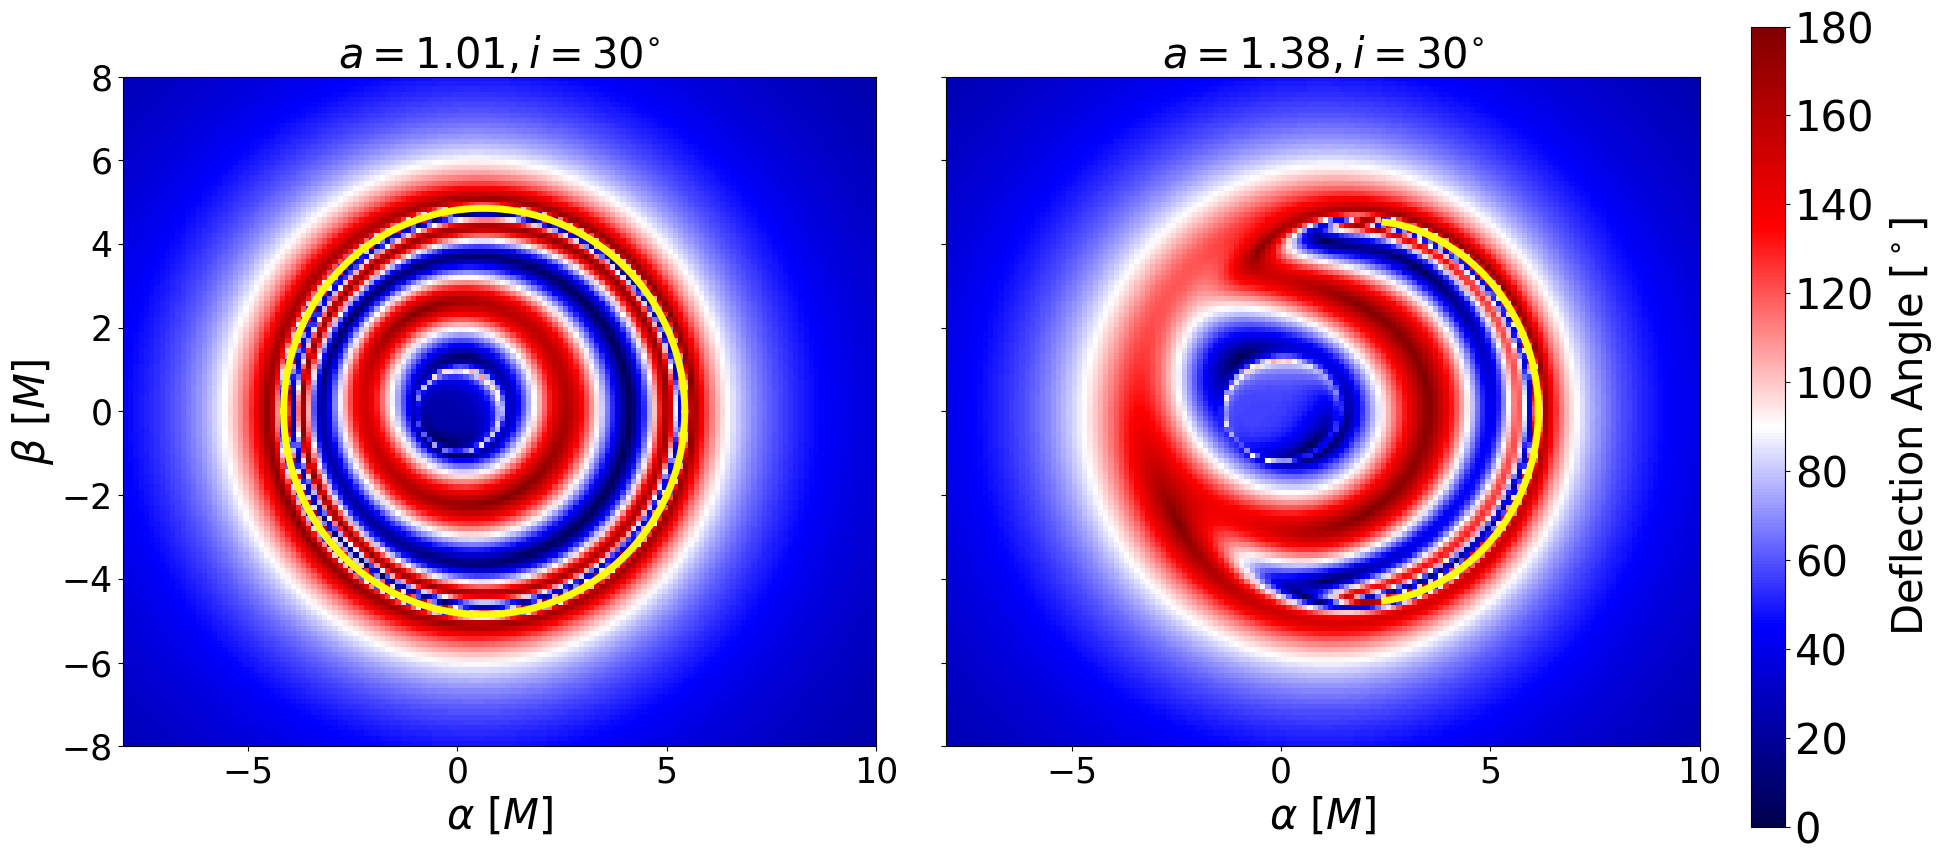

In [81]:
fig, axes = plt.subplots(1,2, figsize=(17,8), sharex=True, sharey=True)
fig.tight_layout()
for k in range(2):
    axes[k].set_xlim(-8,10)
    axes[k].set_ylim(-8,8)
    axes[k].set_xlabel(r'$\alpha$ [$M$]', fontsize = 30)
    axes[k].set_aspect('equal')
axes[0].set_ylabel(r'$\beta$ [$M$]', fontsize = 30)

axes[0].set_title(r"$a = 1.01, i = 30^{\circ}$", fontsize = 30)
axes[1].set_title(r"$a = 1.38, i = 30^{\circ}$", fontsize = 30)

axes[0].plot(*shadow(aspin = 1.01, inc = 15*np.pi/180), color = "yellow", linewidth = 5) # no gap and gap are possible
axes[1].plot(*shadow(aspin = 1.38, inc = 30*np.pi/180), color = "yellow", linewidth = 5) # only no gap

im = axes[0].imshow(darr(1.01, 15), origin='lower', extent=[-8,10,-8,8], vmin=0, vmax=180, cmap='seismic')
im = axes[1].imshow(darr(1.38, 30), origin='lower', extent=[-8,10,-8,8], vmin=0, vmax=180, cmap='seismic')

cax  = fig.add_axes([1.005, 0, 0.02, 1])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label(label=r'Deflection Angle [$^\circ$]', fontsize = 30, labelpad = 10)

## Figure 10. Deflection plots for different spins and inclination

Note that the shadow geometry (closed, open, vanishing) is consistent with the analytical spin-inclination phase space.

See section 3.2 of [Nguyen et al. 2023](https://iopscience.iop.org/article/10.3847/1538-4357/ace697) for further discussion on the numerical set-up.

In [82]:
fig, axes = plt.subplots(6, 6, figsize = (78, 78), sharex=True, sharey=True)
aarr = np.array([2.20, 1.88, 1.61, 1.38, 1.18, 1.01])
iarr = np.array([0, 15, 30, 45, 60, 75])
fig.tight_layout()
for m in range(6):
    axes[m,0].set_ylabel("a = "+str(aarr[m]), fontsize=125, rotation = 'horizontal', labelpad = 200)
    axes[5,m].set_xlabel(r"i = "+str(iarr[m])+"$^\circ$", fontsize=125)
    for n in range(6):
      axes[m,n].set_xlim(-8,10)
      axes[m,n].set_ylim(-8, 8)
      axes[m,n].set_aspect('equal')
      axes[m,n].tick_params(axis='both', labelsize=105)
      im = axes[m, n].imshow(darr(aarr[m], iarr[n]), origin='lower', extent=[-8,10,-8,8], vmin=0, vmax=180, cmap='seismic')
plt.locator_params(nbins=5)

fig.text(0.5, -0.04, r'$\alpha$ [$M$]', ha='center', va='center', fontsize = 145)
fig.text(-0.05, 0.5, r'$\beta$ [$M$]', ha='center', va='center', rotation='horizontal', fontsize = 145)

cax  = fig.add_axes([1.005, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=105)
cbar.set_label(label=r'Deflection Angle [$^\circ$]', fontsize = 125, labelpad = 40)